# Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)

df = pd.read_csv("04.24.22 Features Plus New Variables.csv")

In [ ]:
df.head()

,File,lapneg_gavg,lappos_gavg,sobelh_gavg,sobelv_gavg,lapneg_rat,lappos_rat,sobelh_rat,sobelv_rat,Variance,...,Laplacian Negative Color Avg,Laplacian Negative Gray Avg,sobelv_gmax10,sobelv_gmax50,sobelh_gmax10,sobelh_gmax50,lapneg_gmax10,lapneg_gmax50,Class,Reclass
0,030FD_070075.jpg,2.285475,248.814349,0.643955,0.663535,2.162001,1.000000,2.616644,3.294904,0.179262,...,79.022530,110.771491,3.453451,1.048119,3.592773,1.373046,6.447917,2.982383,1,0
1,046TE_056100.jpg,1.241924,245.124902,0.596895,1.031123,1.747453,1.001333,2.904580,2.761612,0.244305,...,74.495421,104.005858,4.875000,1.765273,2.990885,1.029714,2.729167,1.561797,1,1
2,030FD_067125.jpg,2.185658,225.971680,0.807962,1.084945,1.940613,1.000047,2.472751,2.589823,0.492954,...,70.434783,87.978332,5.724284,2.210299,4.463542,1.805091,7.357096,3.791120,1,1
3,030FD_013375.jpg,1.003548,148.306556,0.154167,0.157926,2.927421,1.591819,5.436649,4.967019,0.060758,...,34.950225,90.614992,2.353190,0.473763,2.473958,0.455052,4.621094,1.578555,1,1
4,030FD_012225.jpg,0.834316,141.667546,0.105742,0.050068,3.732939,1.304853,7.885557,11.307782,0.007880,...,30.776138,79.282629,1.258138,0.111263,2.222331,0.281823,4.308919,1.154297,1,1


# Normalize Data

In [ ]:
cols = df.columns
imgs = df['File']
for col in cols:
  if col != 'File':
    df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

df.head()

,File,lapneg_gavg,lappos_gavg,sobelh_gavg,sobelv_gavg,lapneg_rat,lappos_rat,sobelh_rat,sobelv_rat,Variance,...,Laplacian Negative Color Avg,Laplacian Negative Gray Avg,sobelv_gmax10,sobelv_gmax50,sobelh_gmax10,sobelh_gmax50,lapneg_gmax10,lapneg_gmax50,Class,Reclass
0,030FD_070075.jpg,0.426560,0.954327,0.257435,0.290380,0.033823,0.000000,0.166871,0.081927,0.175586,...,0.901998,0.900533,0.078126,0.253860,0.246773,0.237529,0.081761,0.325439,1.0,0.0
1,046TE_056100.jpg,0.186914,0.927086,0.237502,0.462271,0.015540,0.002252,0.212400,0.056845,0.240920,...,0.824483,0.790577,0.113368,0.439809,0.202807,0.175847,0.028415,0.138475,1.0,1.0
2,030FD_067125.jpg,0.403638,0.785665,0.326900,0.487440,0.024059,0.000080,0.144118,0.048765,0.490683,...,0.754956,0.530097,0.134423,0.555198,0.310381,0.315148,0.094803,0.431878,1.0,1.0
3,030FD_013375.jpg,0.132173,0.212211,0.049985,0.053947,0.067582,1.000000,0.612775,0.160570,0.056552,...,0.147380,0.572948,0.050850,0.104937,0.165046,0.072606,0.055555,0.140681,1.0,1.0
4,030FD_012225.jpg,0.093310,0.163191,0.029475,0.003510,0.103110,0.515111,1.000000,0.458790,0.003436,...,0.075910,0.388774,0.023702,0.010946,0.146665,0.041484,0.051077,0.084844,1.0,1.0


- Targets are in the Reclass column
- Drop everything that is not a feature

In [ ]:
class_df = df["Reclass"]
data_df = df.drop(["File", "Class", "Reclass"], axis=1)

In [ ]:
X = np.array(data_df)
y = np.array(class_df)

# Split into test and training data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Rank Feature Importances Using Random Forest Classifier

lapneg_gavg :  0.02
lappos_gavg :  0.02
sobelh_gavg :  0.11
sobelv_gavg :  0.02
lapneg_rat :  0.0
lappos_rat :  0.0
sobelh_rat :  0.01
sobelv_rat :  0.0
Variance :  0.01
EM Variance :  0.0
Local Variance :  0.0
EM Local Variance :  0.0
Entropy :  0.01
Crofton Perimeter :  0.0
Standard Deviation :  0.0
Partial Derivative Sum :  0.06
Number of Corners :  0.19
Average Corner Strength :  0.12
Sobel V Color Avg :  0.12
Sobel V Gray Avg :  0.03
Sobel H Color Avg :  0.0
Sobel H Gray Avg :  0.03
Laplacian Positive Color Avg :  0.0
Laplacian Positive Gray Avg :  0.0
Laplacian Negative Color Avg :  0.01
Laplacian Negative Gray Avg :  0.0
sobelv_gmax10 :  0.01
sobelv_gmax50 :  0.05
sobelh_gmax10 :  0.07
sobelh_gmax50 :  0.07
lapneg_gmax10 :  0.01
lapneg_gmax50 :  0.01


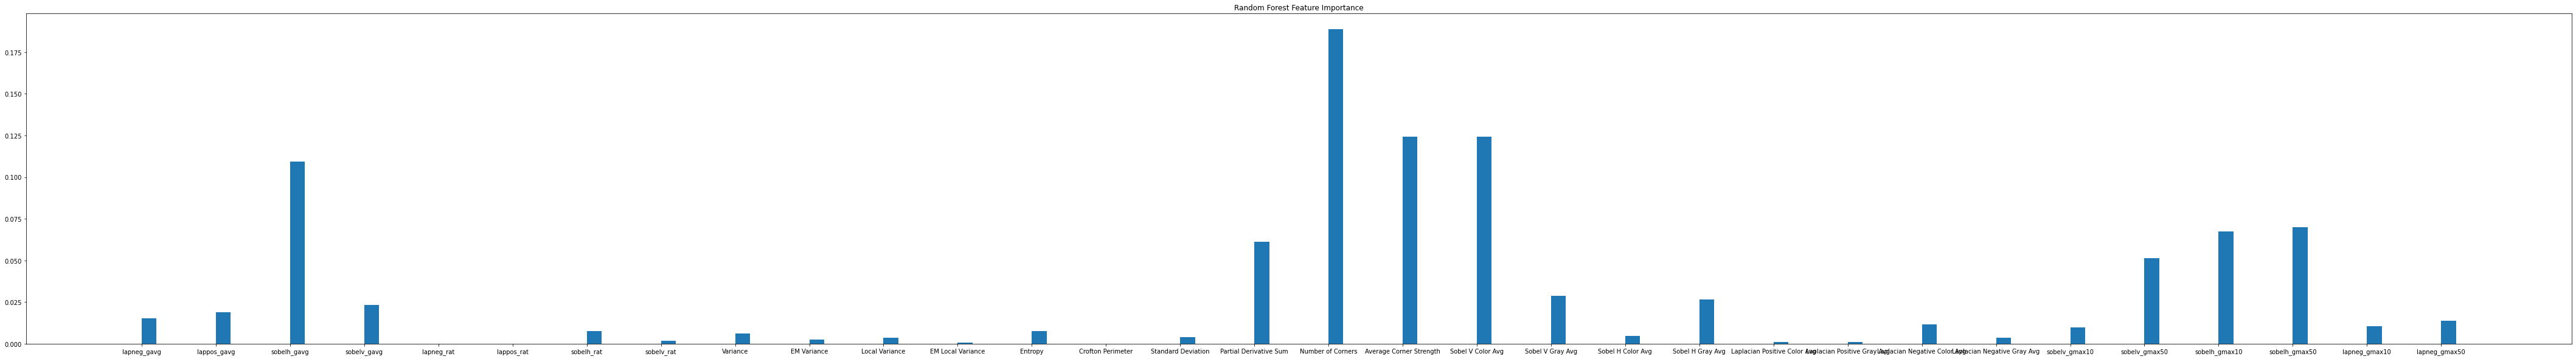

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

regr = RandomForestClassifier(max_depth=2, random_state=0)
regr.fit(X, y)
feats = data_df.columns
imps = regr.feature_importances_

for i in range(len(feats)):
  print(feats[i], ": ", round(imps[i], 2))

plt.figure(figsize=(75, 10))  # width:20, height:3
plt.bar(feats, imps, align='edge', width=0.2)
plt.title("Random Forest Feature Importance")
plt.show()

- The most important features seems to be number of corners, average corner strength, sobel v color avg, and sobelh_gavg. 
- Below I define a function to pick out the features I want to use to train the ANN

In [ ]:
def get_spec_feats(X, idxs):
  new_X = []
  for x in range(len(X)):
    new_row = []
    for i in range(len(X[x])):
      if i in idxs:
        new_row.append(X[x][i])
    new_X.append(new_row)
  return np.array(new_X)

feat_dict = {}
for i in range(len(cols)):
  feat_dict[cols[i]] = i

new_X_train = get_spec_feats(X_train, [feat_dict["lapneg_gavg"], feat_dict["lappos_gavg"], feat_dict["sobelh_gavg"], feat_dict["sobelv_gavg"], feat_dict["Partial Derivative Sum"], feat_dict["Number of Corners"], feat_dict["Average Corner Strength"], 
          feat_dict["Sobel V Color Avg"], feat_dict["Sobel V Gray Avg"], feat_dict["Sobel H Gray Avg"], feat_dict["sobelv_gmax50"], feat_dict["sobelh_gmax10"], feat_dict["sobelh_gmax50"], feat_dict["lapneg_gmax50"], feat_dict["Crofton Perimeter"]])

new_X_test = get_spec_feats(X_test, [feat_dict["lapneg_gavg"], feat_dict["lappos_gavg"], feat_dict["sobelh_gavg"], feat_dict["sobelv_gavg"], feat_dict["Partial Derivative Sum"], feat_dict["Number of Corners"], feat_dict["Average Corner Strength"], 
          feat_dict["Sobel V Color Avg"], feat_dict["Sobel V Gray Avg"], feat_dict["Sobel H Gray Avg"], feat_dict["sobelv_gmax50"], feat_dict["sobelh_gmax10"], feat_dict["sobelh_gmax50"], feat_dict["lapneg_gmax50"], feat_dict["Crofton Perimeter"]])

# Define the ANN
- 4 layers
- 256 nodes in each layer
- activation functions | tanh -> tanh -> elu -> elu 
- Adam Optimizer
- Cross-Entropy Loss Function
- 395 epochs

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='tanh', use_bias=False),
    tf.keras.layers.Dense(256, activation='tanh', use_bias=False),
    tf.keras.layers.Dense(256, activation='elu', use_bias=False),
    tf.keras.layers.Dense(256, activation='elu', use_bias=False),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(new_X_train, y_train, epochs=395)

Epoch 1/395
24/24 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 2/395
24/24 [==============================] - 0s 9ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 3/395
24/24 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 4/395
24/24 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 5/395
24/24 [==============================] - 0s 8ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 6/395
24/24 [==============================] - 0s 11ms/step - loss: 0.0070 - accuracy: 0.9987
Epoch 7/395
24/24 [==============================] - 0s 8ms/step - loss: 0.0640 - accuracy: 0.9787
Epoch 8/395
24/24 [==============================] - 0s 8ms/step - loss: 0.2008 - accuracy: 0.9495
Epoch 9/395
24/24 [==============================] - 0s 9ms/step - loss: 0.4158 - accuracy: 0.9109
Epoch 10/395
24/24 [==============================] - 0s 8ms/step - loss: 0.1941 - accuracy: 0.9441
Epoch 11

# Because our data is unbalanced (about 85% non-obscured images), we can get an accuracy of 85% just by classifying all images as non-obscured. Thus, I used a confusion matrix to ensure that this was not happening.

In [ ]:
y_pred = model.predict(new_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [  9,  19]], dtype=int32)>

# Print file names of incorrect classifications

In [ ]:
def check_each(l1, l2):
  all_eq = True
  for i in range(len(l1)):
    if l1[i] != l2[i]:
      all_eq = False
  return all_eq

df = pd.read_csv("/content/04.24.22 Features Plus New Variables.csv")

imgs = df['File']
df.index = df['File']
df = df.drop(['File', 'Class'], axis=1)

cols = df.columns
for col in cols:
  if col != 'File':
    df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

wrong_x = []
for i in range(len(y_pred_bin)):
  if y_pred_bin[i] != y_test[i]:
    wrong_x.append(X_test[i])

wrong_imgs = []
for img in imgs:
  if sum([check_each(list(df.loc[img][:-1]), i) for i in wrong_x]) == 1:
    wrong_imgs.append((img, df.loc[img][-1]))

print(wrong_imgs)

[('030FD_037775.jpg', 1.0), ('030FD_068925.jpg', 1.0), ('030FD_044850.jpg', 1.0), ('030FD_053525.jpg', 0.0), ('046TE_037375.jpg', 1.0)]
